# Which telecom operator megaline plan is a better plan?

## Introduction

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [64]:
# Loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Load the Datasets

In [65]:
# Load the data files into different DataFrames
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

In [66]:
# Display the first 5 rows of all the DataFrames
display(calls.head())
display(internet.head())
display(messages.head())
display(plans.head())
display(users.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Prepare the data

### Missing values

In [67]:
# Check for missing values in the calls DataFrame
print(calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [68]:
# Check for missing values in the internet DataFrame
print(internet.isna().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [69]:
# Check for missing values in the messages DataFrame
print(messages.isna().sum())

id              0
user_id         0
message_date    0
dtype: int64


In [70]:
# Check for missing values in the plans DataFrame
print(plans.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [71]:
# Check for missing values in the users DataFrame
print(users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


## `plans` DataFrame 

### General Summary

In [72]:
# Display the shape of plans the DataFrame 
n_rows, n_cols = plans.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 2 rows and 8 columns


In [ ]:
# Display the informative summary of the 'plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [74]:
# Display the descriptive statistics of the 'plans' DataFrame
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


After printing the general information and the printed data sample for the Dataframe plans, I didn't saw any inappropriate data. Also there were no duplicated data and no missing data found. The 'usd_per_message' and 'usd_per_minute' columns data types were changed from float to an integer data type. 

In [75]:
# Display the duplicates in the 'plans' DataFrame
duplicated_plans = plans[plans.duplicated()]
print(f"Number of duplicated plans: {duplicated_plans.shape[0]}")

Number of duplicated plans: 0


In [76]:
# Display the unique values in the 'plans' DataFrame
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Users

### General Summary

In [77]:
# Display the shape of users the DataFrame
n_rows, n_cols = users.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 500 rows and 8 columns


In [78]:
# Display the informative summary of the 'users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [79]:
# Display the descriptive statistics of the 'users' DataFrame
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In 'Users' dataframe, no duplicate data were found. But 'churn_date' had 466 missing data. Along with this, 'reg_date' and 'churn_date' data types were changed from object to datatime. Two new columns were made ' reg_month' and ' churn_month', in which the data columns were converted to month ones. With this, a separate columns was made to separate the name of the state from city, which was needed to test the second hypothesis.

### Fix `users` DataFrame

In [80]:
# Convert the 'reg_date' column to datetime format
users['reg_date'] = pd.to_datetime(users['reg_date'])

# Convert the 'churn_date' column to datetime format
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [81]:
# Check if the datatype of 'reg_date' and 'churn_date' columns is datetime
print(users['reg_date'].dtype)
print(users['churn_date'].dtype)

datetime64[ns]
datetime64[ns]


In [82]:
# Display the duplicates in the 'users' DataFrame
duplicated_users = users[users.duplicated()]
print(f"Number of duplicated megaline users: {duplicated_users.shape[0]}")

Number of duplicated megaline users: 0


In [83]:
# Add a new column 'state' to the 'users' DataFrame
users[['city', 'state']] = users['city'].str.split(', ', expand=True)

# Display the sample of the 'users' DataFrame
display(users.sample())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
410,1410,Wendell,Lloyd,46,Los Angeles-Long Beach-Anaheim,2018-10-06,surf,NaT,CA MSA


In [84]:
# Add a new column 'reg_month' to the 'users' DataFrame
# Convert the 'reg_date' column to period format
users['reg_month'] = users['reg_date'].dt.to_period('M')

# Add a new column 'churn_month' to the 'users' DataFrame
# Convert the 'churn_date' column to period format
users['churn_month'] = users['churn_date'].dt.to_period('M')

In [85]:
# Check if the datatype of 'reg_month' and 'churn_month' columns is period
print(users['reg_month'].dtype)
print(users['churn_month'].dtype)

period[M]
period[M]


## Calls

### General Summary

In [86]:
# Display the shape of calls the DataFrame
n_rows, n_cols = calls.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 137735 rows and 4 columns


In [87]:
# Display the informative summary of the 'calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [88]:
# Display the descriptive statistics of the 'calls' DataFrame
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [89]:
# Print a sample of data for calls
display(calls.sample())

,id,user_id,call_date,duration
102079,1362_843,1362,2018-03-17,4.14


In 'Calls' dataframe, no duplicate or missing data were found. 'call_date' column data type was changed from object to datatime and 'duration' column datatype was changed to integer. Also, a new column was made 'month' in which the date column was converted to month. 

### Fix `calls` DataFrame

[Fix obvious issues with the data given the initial observations.]

In [90]:
# Display the duplicates in the 'calls' DataFrame
duplicated_calls = calls[calls.duplicated()]
print(f"Number of duplicated calls: {duplicated_calls.shape[0]}")

Number of duplicated calls: 0


In [91]:
# Convert the 'call_date' column to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Check if the datatype of 'call_date' column is datetime
print(calls['call_date'].dtype)


datetime64[ns]


In [92]:
# Convert the 'duration_minutes' column to numeric format
calls['duration_minutes'] = np.ceil(calls['duration'])

# Check if the datatype of 'duration_minutes' column is numeric
print(calls['duration_minutes'].dtype)


float64


In [93]:
# Add a new column 'month' to the 'calls' DataFrame
# Convert the 'call_date' column to period format
calls['month'] = calls['call_date'].dt.to_period('M')

# Check if the datatype of 'month' column is period
print(calls['month'].dtype)

period[M]


## Messages

### General Summary

In [94]:
# Display the shape of internet the DataFrame
n_rows, n_cols = messages.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 76051 rows and 3 columns


In [95]:
# Display the informative summary of the 'messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [96]:
# Display the descriptive statistics of the 'messages' DataFrame
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In 'Messages' dataframe, no duplicate or missing data were found. 'message_date' column data type was changed from object to datatime and then a new column was made 'month' in which the date column was converted to month. 

### Fix `messages` DataFrame

In [97]:
# Check for duplicates in the 'messages' DataFrame
duplicated_messages = messages[messages.duplicated()]
print(f"Number of duplicated messages: {duplicated_messages.shape[0]}")

Number of duplicated messages: 0


In [98]:
# Convert the 'message_date' column to datetime format
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Check if the datatype of 'message_date' column is datetime
print(messages['message_date'].dtype)

datetime64[ns]


In [99]:
# Add a new column 'message_month' to the 'messages' DataFrame
# Convert the 'message_date' column to period format
messages['month'] = messages['message_date'].dt.to_period('M')

# Display the `messages` DataFrame
display(messages.sample())

,id,user_id,message_date,month
49282,1328_240,1328,2018-12-30,2018-12


## Internet

### General Summary

In [100]:
# Display the shape of internet the DataFrame
n_rows, n_cols = internet.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 104825 rows and 4 columns


In [101]:
# Display the informative summary of the 'internet' DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [102]:
# Display the descriptive statistics of the 'internet' DataFrame
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In 'Internet' dataframe, no duplicate or missing data were found. 'session_date' column data type was changed from object to datatime and then a new column was made 'month' in which the data column was converted to month. 

### Fix `internet` DataFrame

In [103]:
# Check for duplicates in the 'internet' DataFrame
duplicated_internet = internet[internet.duplicated()]
print(f"Number of duplicated internet: {duplicated_internet.shape[0]}")

Number of duplicated internet: 0


In [104]:
# Add a new column 'session_date' to the 'internet' DataFrame
#  Convert the 'session_date' column to datetime format
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Check if the datatype of 'session_date' column is datetime
print(internet['session_date'].dtype)

datetime64[ns]


In [105]:
# Add a new column 'month' to the 'internet' DataFrame
# Convert the 'session_date' column to period format
internet['month'] = internet['session_date'].dt.to_period('M')

# Check if the datatype of 'month' column is period
print(internet['month'].dtype)

period[M]


In [106]:
# Add a new column 'gb_used' to the 'internet' DataFrame
internet['gb_used'] = internet['mb_used']/ 1024

# Display the sample of the 'internet' DataFrame
display(internet.sample())

,id,user_id,session_date,mb_used,month,gb_used
103459,1495_61,1495,2018-09-19,316.26,2018-09,0.308848


## Plan conditions

Megaline rounds seconds to minutes and megaytes to gigabytes. For calls, each call is rounded up - even if the call lasted just for second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up, instead the total for the month is rounded up. Eg. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes. 

1. Surf: 
   - Monthly charge: 20 dollars
   - 500 monthly minutws, 50 texts, and 15GB of data
   - After exceeding the package limits:
      - 1minute: 3 cents
      - text message; 3 cents
      - 1GB of data: 10 dollars

2. Ultimate:
   - Monthly charge: 70 dollars
   - 3000 monthly minutes, 1000 text messages, and 30GB of data
   - After exceeding the package limits:
      - 1minute: 1 cent
      - text message; 1 cent
      - 1GB of data: 7 dollars
 


## Aggregate data per user

In [107]:
# Calculate the number of calls made by each user per month. Save the result in a new DataFrame called `calls_per_user_per_month`.
calls_per_user_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')
display(calls_per_user_per_month.head())

,user_id,month,call_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [108]:
# Calculate the amount of minutes spent by each user per month. Save the result in a new DataFrame called `minutes_per_user_per_month`.
minutes_per_user_per_month = calls.groupby(['user_id', 'month'])['duration_minutes'].sum().reset_index(name='call_duration')
display(minutes_per_user_per_month.head())

,user_id,month,call_duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0


In [112]:
# Calculate the number of messages sent by each user per month. Save the result in a new DataFrame called `messages_per_user_per_month`.
messages_per_user_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')
display(messages_per_user_per_month.head())

,user_id,month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [113]:
# Calculate the volume of internet traffic used by each user per month. Save the result in a new DataFrame called `internet_per_user_per_month`.
internet_per_user_per_month = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
display(internet_per_user_per_month.head())


,user_id,month,gb_used
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605


In [ ]:
# Merge the data for calls, minutes, messages, internet based on user_id and month to create a single DataFrame called `megaline`.
megaline = (
    calls_per_user_per_month.merge(minutes_per_user_per_month, 
                                   on=['user_id', 'month'], 
                                   how='outer')
                                   .merge(messages_per_user_per_month, 
                                          on=['user_id', 'month'], 
                                          how='outer')
                                          .merge(internet_per_user_per_month, 
                                                 on=['user_id', 'month'], 
                                                 how='outer')
                                                 )
display(megaline.head())

,user_id,month,call_count,call_duration,messages_count,gb_used
0,1000,2018-12,16.0,124.0,11.0,1.856904
1,1001,2018-08,27.0,182.0,30.0,6.756982
2,1001,2018-09,49.0,315.0,44.0,13.002754
3,1001,2018-10,65.0,393.0,53.0,21.807119
4,1001,2018-11,64.0,426.0,36.0,18.070605


### Fix missing values in `megaline` DataFrame

In [117]:
#  Fill the missing values in the `megaline` DataFrame with 0 for the columns 'call_count', 'call_duration', 'messages_count', 'mb_used', and 'gb_used'.
megaline['call_count'] = megaline['call_count'].fillna(value='0')
megaline['call_duration'] = megaline['call_duration'].fillna(value='0')
megaline['messages_count'] = megaline['messages_count'].fillna(value='0')
megaline['gb_used'] = megaline['gb_used'].fillna(value='0')

display(megaline.head())

,user_id,month,call_count,call_duration,messages_count,gb_used
0,1000,2018-12,16.0,124.0,11.0,1.856904
1,1001,2018-08,27.0,182.0,30.0,6.756982
2,1001,2018-09,49.0,315.0,44.0,13.002754
3,1001,2018-10,65.0,393.0,53.0,21.807119
4,1001,2018-11,64.0,426.0,36.0,18.070605


In [118]:
# Add the plan information to the `megaline` DataFrame by merging it with the `users` DataFrame based on the 'user_id' column.
plan_information = pd.merge(megaline, users[['user_id', 'plan', 'state']], on='user_id', how='left')
display(plan_information.head())

,user_id,month,call_count,call_duration,messages_count,gb_used,plan,state
0,1000,2018-12,16.0,124.0,11.0,1.856904,ultimate,GA MSA
1,1001,2018-08,27.0,182.0,30.0,6.756982,surf,WA MSA
2,1001,2018-09,49.0,315.0,44.0,13.002754,surf,WA MSA
3,1001,2018-10,65.0,393.0,53.0,21.807119,surf,WA MSA
4,1001,2018-11,64.0,426.0,36.0,18.070605,surf,WA MSA


In [122]:
# Display the data types of the columns in the `plan_information` DataFrame
print(plan_information.dtypes)

user_id               int64
month             period[M]
call_count           object
call_duration        object
messages_count       object
gb_used              object
plan                 object
state                object
dtype: object


In [ ]:
# Convert the columns 'call_count', 'call_duration', 'messages_count', and 'gb_used' to numeric format.
plan_information['call_count'] = pd.to_numeric(plan_information['call_count'], 
                                               errors='coerce')

plan_information['messages_count'] = pd.to_numeric(plan_information['messages_count'], 
                                                   errors='coerce')

plan_information['gb_used'] = pd.to_numeric(plan_information['gb_used'], 
                                            errors='coerce')

plan_information['call_duration'] = pd.to_numeric(plan_information['call_duration'], 
                                                  errors='coerce')

# Check the data types of the columns in the `plan_information` DataFrame after conversion
print(plan_information.dtypes)

user_id               int64
month             period[M]
call_count          float64
call_duration       float64
messages_count      float64
gb_used             float64
plan                 object
state                object
revenue             float64
dtype: object


## Calculate the monthly revenue from each user

In [130]:
# Calculate the monthly revenue for each user based on their plan and usage.
# Create a function to calculate the monthly revenue for each user based on their plan and usage.

def monthly_revenue(row):
    user_plan = plans[plans['plan_name'] == row['plan']]
    
    revenue = user_plan['usd_monthly_pay'].values[0]
    
    diff_min = row['call_count'] - user_plan['minutes_included'].values[0]
    if diff_min > 0:
        revenue += diff_min * user_plan['usd_per_minute'].values[0]
    
    diff_msg = row['messages_count'] - user_plan['messages_included'].values[0]
    if diff_msg > 0:
        revenue += diff_msg * user_plan['usd_per_message'].values[0]
    
    diff_gb = row['gb_used'] - user_plan['gb_per_month_included'].values[0]
    if diff_gb > 0:
        revenue += diff_gb * user_plan['usd_per_gb'].values[0]
        
    return revenue

In [132]:
# Apply the function to the `plan_information` DataFrame to calculate the monthly revenue for each user.
plan_information['revenue'] = plan_information.apply(monthly_revenue, axis=1)

# Display the first 5 rows of the `plan_information` DataFrame with the calculated revenue.
display(plan_information[['user_id', 'plan', 'month', 'revenue','state']].head())
       
    

,user_id,plan,month,revenue,state
0,1000,ultimate,2018-12,70.000000,GA MSA
1,1001,surf,2018-08,20.000000,WA MSA
2,1001,surf,2018-09,20.000000,WA MSA
3,1001,surf,2018-10,88.161191,WA MSA
4,1001,surf,2018-11,50.706055,WA MSA


## Study user behaviour

### Calculate descriptive statistics for the aggregated and merged data. 

In [135]:
# Compare average duration of calls per each plan per each distinct month.
average_duration_per_plan_per_month = plan_information.groupby(['plan', 'month'])['call_duration'].mean().reset_index()
display(average_duration_per_plan_per_month.head())

,plan,month,call_duration
0,surf,2018-01,203.000000
1,surf,2018-02,297.000000
2,surf,2018-03,330.000000
3,surf,2018-04,351.540000
4,surf,2018-05,399.584416


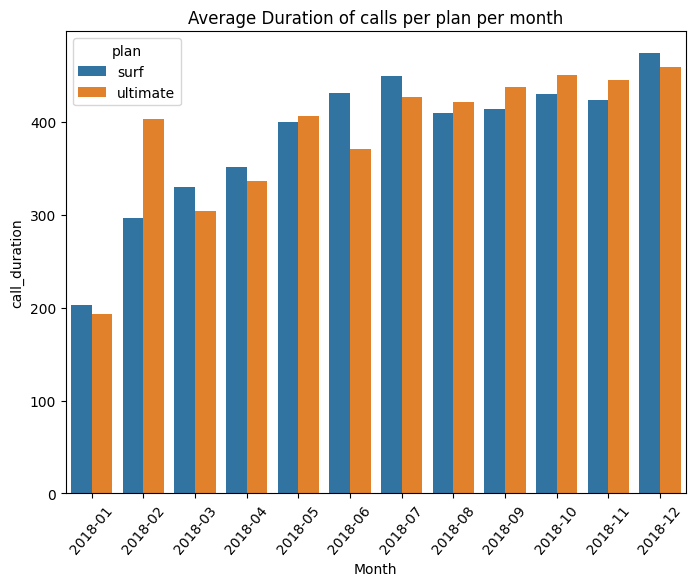

In [137]:
# Create a bar plot to visualize the average duration of calls per plan per month.
plt.figure(figsize=(8, 6))
sns.barplot(data= average_duration_per_plan_per_month, x='month', y='call_duration', hue='plan')
plt.title('Average Duration of calls per plan per month')
plt.xlabel('Month')
plt.ylabel=('Call duration (minutes)')
plt.xticks(rotation=50)  
plt.show()

From the graph to compare the average duration of calls per each plan per each distinct month, it can be seen that there not a much difference between the call duration each month per plan. But, in the month of Feb we can see a hugh difference between the call duration based on different plans: surf and ulimate. If we see to the monthly call duration, most of the calls are done within the limits of the surf plan. Also, the call duration of the users of ultimate plan are well within the limits of surf plan. There is not a single user having call duration above 450 minutes, which is really less compare to the limits of the ulimate plan. 

In [139]:
# Compare the number of minutes users of each plan require each month.
minutes_per_plan_per_month = plan_information.groupby(['plan', 'month'])['call_duration'].sum().reset_index()
display(minutes_per_plan_per_month.head())

,plan,month,call_duration
0,surf,2018-01,406.0
1,surf,2018-02,2673.0
2,surf,2018-03,7590.0
3,surf,2018-04,17577.0
4,surf,2018-05,30768.0


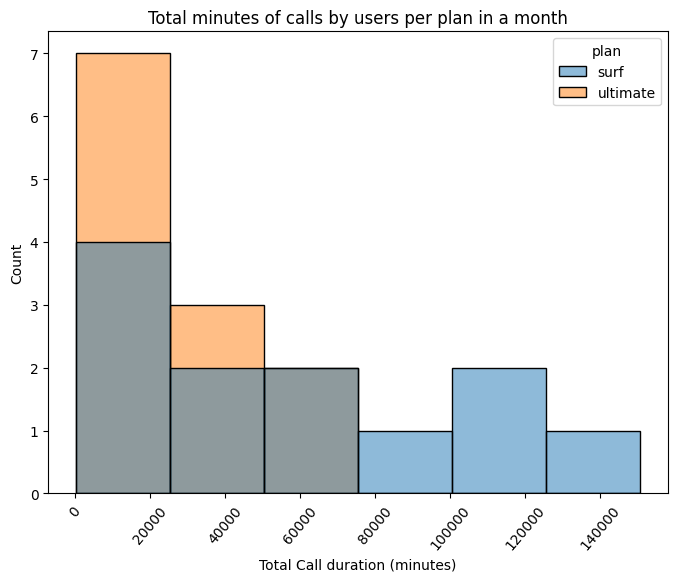

In [ ]:
# Create a histogram plot to visualize the total minutes of calls by users per plan in a month.
plt.figure(figsize=(8, 6))
sns.histplot(data= minutes_per_plan_per_month, 
             x='call_duration', 
             hue='plan')
plt.title('Total minutes of calls by users per plan in a month')
plt.xlabel('Total Call duration (minutes)')
plt.ylabel=('Number of Users') # Why this code didn't change the y axis label
plt.xticks(rotation=50)
plt.show()


The graph here shows the number of minutes users of each plan require each month.From this graph it can be seen that there are 6 users of ultimate plan, whose number of minutes ranges from 0 - 20000 minutes, while 3 users whose number of minutes if from 20000 - 40000, and the same number of users whose range is from 40000 - 60000. For all these three ranges, the number of surf plan users are less than that of ulimate plan users. While for the number of minutes exceeding 60000 minutes, there are only users from surf plans and none from ultimate plans. 

### Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.

In [141]:
# Calculate the mean and the variance of the monthly call duration
monthly_call_stats = plan_information.groupby(['plan','month'])['call_duration'].agg(['mean', 'var']).reset_index()
display(monthly_call_stats.head())

,plan,month,mean,var
0,surf,2018-01,203.000000,15842.000000
1,surf,2018-02,297.000000,52226.500000
2,surf,2018-03,330.000000,35809.363636
3,surf,2018-04,351.540000,50866.743265
4,surf,2018-05,399.584416,59754.219754


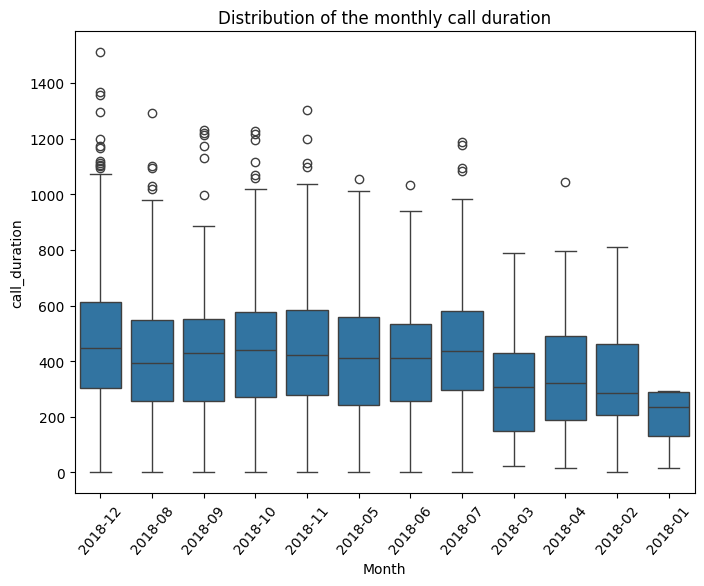

In [ ]:
# Create a box plot to visualize the distribution of the monthly call duration for each plan.
plt.figure(figsize=(8, 6))
sns.boxplot(data= plan_information, 
            x='month', 
            y='call_duration')
plt.title('Distribution of the monthly call duration')
plt.xlabel('Month')
plt.ylabel=('Call duration (minutes)')
plt.xticks(rotation=50)  # Keep the x-axis labels horizontal for readability
plt.show()

From the mean and variance, it can be known that there in not much difference in there call behavior between the plans. 

In [ ]:
# Calculate the number of messages users of each plan tend to send each month
messages_per_plan_per_month = plan_information.groupby(['plan', 'month'])['messages_count'].sum().reset_index()
display(messages_per_plan_per_month.head())


,plan,month,messages_count
0,surf,2018-01,21.0
1,surf,2018-02,108.0
2,surf,2018-03,351.0
3,surf,2018-04,870.0
4,surf,2018-05,1849.0


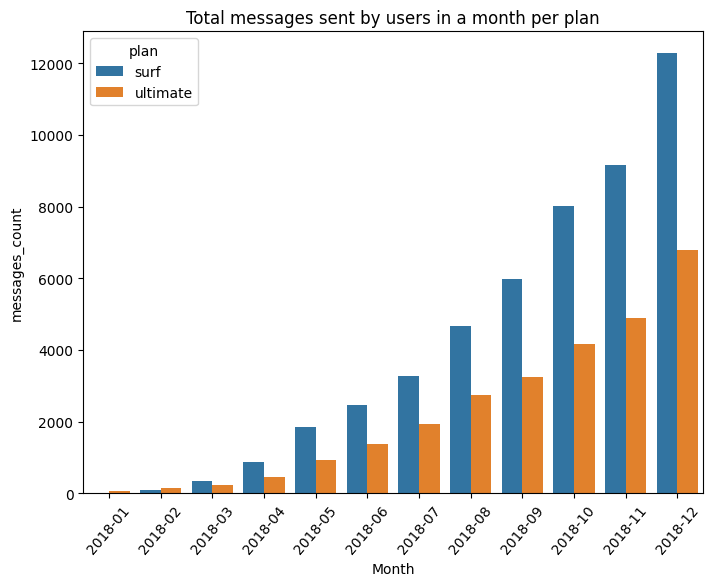

In [ ]:
# Create a bar plot to visualize the total messages sent by users per plan in a month.
plt.figure(figsize=(8, 6))
sns.barplot(data= messages_per_plan_per_month, 
            x='month', 
            y='messages_count', 
            hue='plan')
plt.title('Total messages sent by users in a month per plan')
plt.xlabel('Month')
plt.xticks(rotation=50)  
plt.show()

The graph above shows the number of messages sent by the users of each plan per month. From the graph it can be known that, over the course of the year, the number of messages sent by the users increases as month passes starting from Jan till Dec in both plans. But the number of messages sent by the users of surf plan is more than that of ultimate plans. There is huge difference between the number of messages sent by the users of both plans each month.. So, the trend of sending messages is same among the users from both plans, but the number of messages sent each month is different. Thus, it is known that the surf users send more messages compared to that of ultimate users. 

In [147]:
# Calculate the mean and the variance of the monthly messages count
monthly_messages_stats = plan_information.groupby(['plan','month'])['messages_count'].agg(['mean', 'var']).reset_index()
display(monthly_messages_stats.head())

,plan,month,mean,var
0,surf,2018-01,10.500000,220.500000
1,surf,2018-02,12.000000,386.000000
2,surf,2018-03,15.260870,346.565217
3,surf,2018-04,17.400000,501.591837
4,surf,2018-05,24.012987,847.197198


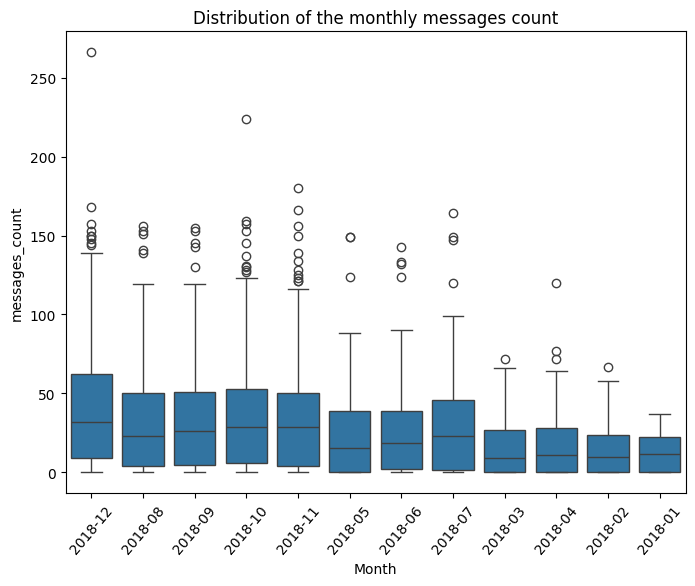

In [ ]:
# Create a box plot to visualize the distribution of the monthly messages count for each plan.
plt.figure(figsize=(8, 6))
sns.boxplot(data= plan_information, 
            x='month', 
            y='messages_count')
plt.title('Distribution of the monthly messages count')
plt.xlabel('Month')
plt.ylabel=('Messages count')
plt.xticks(rotation=50)  # Keep the x-axis labels horizontal for readability
plt.show()

As we move towards the end of the year, the variance of the messages sent decreases. Also, the mean of the messages sent each month by the users of both plans is almost the same. Lastly, it can be seen that some of the months have less or none outliers compare to the rest. 

### Internet

In [ ]:
# Compare the amount of internet traffic consumed by users per plan
internet_per_plan_per_month = plan_information.groupby(['plan', 'month'])['gb_used'].sum().reset_index()
display(internet_per_plan_per_month.head())


,plan,month,gb_used
0,surf,2018-01,9.521211
1,surf,2018-02,107.040615
2,surf,2018-03,299.751094
3,surf,2018-04,585.166162
4,surf,2018-05,1047.948564


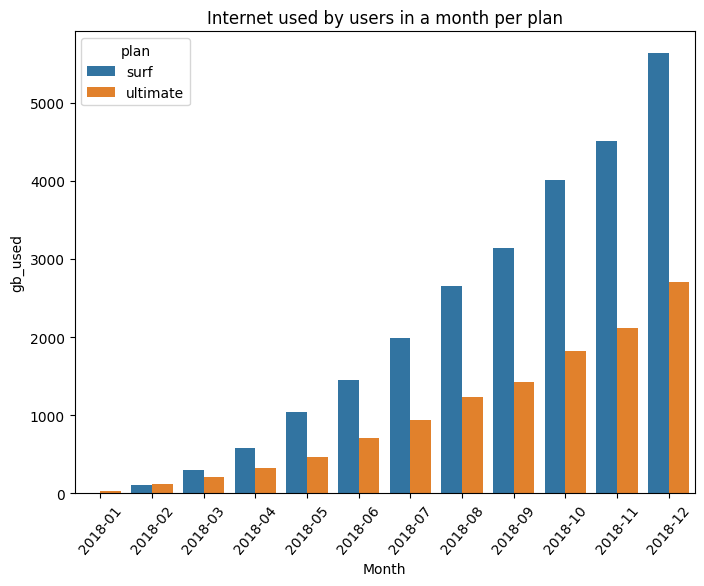

In [ ]:
# Create a bar plot to visualize the total internet traffic used by users per plan in a month.
plt.figure(figsize=(8, 6))
sns.barplot(data= internet_per_plan_per_month, 
            x='month', 
            y='gb_used', 
            hue='plan')
plt.title('Internet used by users in a month per plan')
plt.xlabel('Month')
plt.ylabel=('Internet used')
plt.xticks(rotation=50)  
plt.show()

The graph above shows the internet used by the users of each plan per month. From the graph it can be known that, over the course of the year, the internet used by the users increases as month passes starting from Jan till Dec in both plans. The internet used by the users of surf plan is more than that of ultimate plans. There is huge difference in the internet used by the users of both plans each month. So, the trend of using internet is same among the users from both plans, but the amount of internet used each month is different. Thus, it is known that the surf users had more internet usage compared to that of ultimate users which is similar to the trend of messages send in the previous graph. 

In [151]:
# Calculate the mean and the variance of the monthly internet traffic used
monthly_internet_stats = plan_information.groupby(['plan','month'])['gb_used'].agg(['mean', 'var']).reset_index()
display(monthly_internet_stats.head())

,plan,month,mean,var
0,surf,2018-01,4.760605,17.394976
1,surf,2018-02,11.893402,41.649779
2,surf,2018-03,13.032656,65.084035
3,surf,2018-04,11.703323,56.309643
4,surf,2018-05,13.609722,58.628592


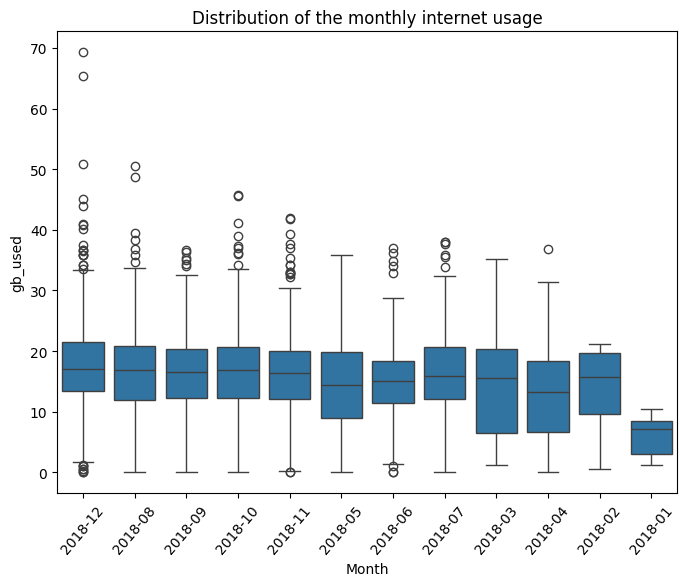

In [ ]:
# Create a box plot to visualize the distribution of the monthly internet traffic used for each plan.
plt.figure(figsize=(8, 6))
sns.boxplot(data= plan_information, 
            x='month', 
            y='gb_used')
plt.title('Distribution of the monthly internet usage')
plt.xlabel('Month')
plt.ylabel=('gb used')
plt.xticks(rotation=50)  # Keep the x-axis labels horizontal for readability
plt.show()

Most of the months have same variance, while months such as May, March, April, and Feb have higher variance except month of Jan. Also, the mean of the messages sent each month by the users of both plans is almost the same, except month of Jan. Lastly, it can be seen that some of the months have less or none outliers compare to the rest. 

In [155]:
# Calculate the mean and the variance of the monthly revenue
plan_revenue_stats = plan_information.groupby(['plan', 'month', 'state'])['revenue'].sum().reset_index()
display(plan_revenue_stats.head())

,plan,month,state,revenue
0,surf,2018-01,CO MSA,20.000000
1,surf,2018-01,PA-NJ-DE-MD MSA,20.000000
2,surf,2018-02,CA MSA,29.366699
3,surf,2018-02,CO MSA,89.359824
4,surf,2018-02,MA-NH MSA,26.663867


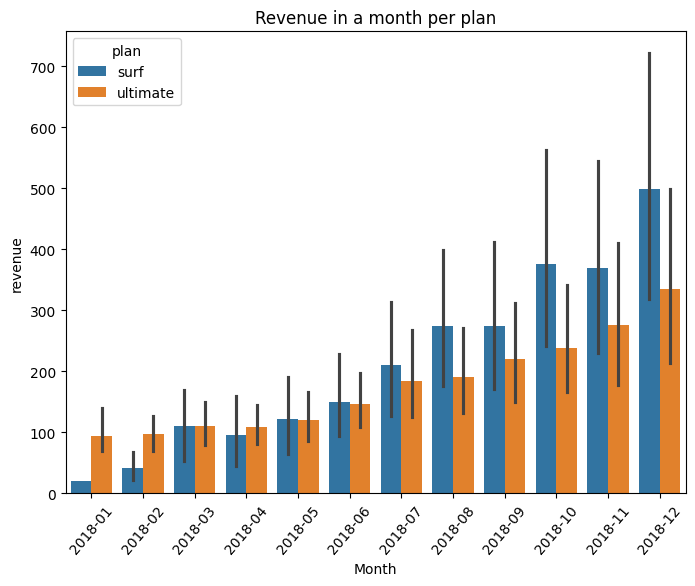

In [ ]:
# Create a bar plot to visualize the total revenue generated by users per plan in a month.
plt.figure(figsize=(8, 6))
sns.barplot(data= plan_revenue_stats, 
            x='month', 
            y='revenue', 
            hue='plan')
plt.title('Revenue in a month per plan')
plt.xlabel('Month')
plt.ylabel=('Revenue')
plt.xticks(rotation=50)  
plt.show()

The graph above shows the revenue generated by the users of each plan per month. From the graph it can be known that, over the course of the year, the revenue generated by the users increases as month passes starting from Jan till Dec in both plans. Even though the number of calls done, messsage sent, and internet usage is more by the users of surf plan when compared to that of ultimate plan, the revenue generated by the users of ultimate plan each month is more than that of surf plan. 

In [157]:
# Calculate the mean and the variance of the monthly revenue
monthly_revenue_stats = plan_information.groupby(['plan','month'])['revenue'].agg(['mean', 'var']).reset_index()
display(monthly_revenue_stats.head())

,plan,month,mean,var
0,surf,2018-01,20.000000,0.000000
1,surf,2018-02,32.107222,390.555003
2,surf,2018-03,43.022875,1381.716673
3,surf,2018-04,37.974985,1094.999695
4,surf,2018-05,44.080927,1742.505216


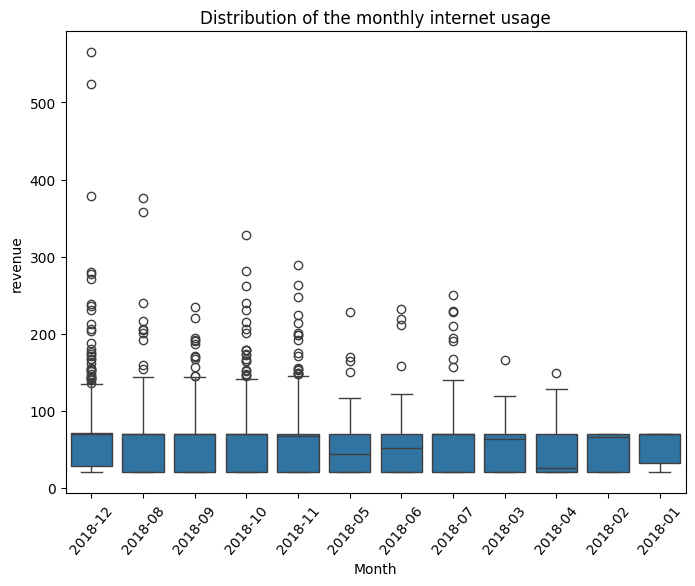

In [ ]:
# Create a box plot to visualize the distribution of the monthly revenue for each plan.
plt.figure(figsize=(8, 6))
sns.boxplot(data= plan_information, 
            x='month', 
            y='revenue')
plt.title('Distribution of the monthly internet usage')
plt.xlabel('Month')
plt.ylabel=('Monthly revenue')
plt.xticks(rotation=50)  # Keep the x-axis labels horizontal for readability
plt.show()

Most of the months have many outliers, but there are some months such as Jan and Feb which does not have asny outlier. Along with that, the means of most of the months revenue are same. Also there are some months which have 0 variance, and some have small whiskers which shows that there is small variance while some have large whikers signifying higher variance. 

## Test statistical hypothesis

### First Hypothesis


**HO:** The average revenue from users of the Ultimate and Surf calling plans are equal. <br>
**HA:** The average revenue from users of the Ultimate calling plan is not equal to the Surf calling plan. <br>
**Statistical test = t-test** <br>
**Alpha value = 0.05**

In [161]:
# Calculate the mean revenue for 'surf' plan
surf_revenue = plan_revenue_stats[plan_revenue_stats['plan'] == 'surf']['revenue'].mean()
print(surf_revenue)

273.57986522829054


In [163]:
# Display the mean revenue for 'surf' plan
surf_revenue = plan_revenue_stats[plan_revenue_stats['plan'] == 'surf']['revenue']
display(surf_revenue.head())

0    20.000000
1    20.000000
2    29.366699
3    89.359824
4    26.663867
Name: revenue, dtype: float64

In [165]:
# Calculate the mean revenue for 'ultimate' plan
ultimate_revenue = plan_revenue_stats[plan_revenue_stats['plan'] == 'ultimate']['revenue'].mean()
print(ultimate_revenue)

211.07145261686992


In [166]:
# Display the mean revenue for 'ultimate' plan
ultimate_revenue = plan_revenue_stats[plan_revenue_stats['plan'] == 'ultimate']['revenue']
display(ultimate_revenue.head())

321    140.0
322     70.0
323     70.0
324    140.0
325    140.0
Name: revenue, dtype: float64

In [ ]:
# Perform a statistical test to check if the average revenue of the two plans is significantly different.

# Set the significance level
alpha = 0.05

# Perform the t-test
results = st.ttest_ind(surf_revenue, 
                       ultimate_revenue)

# Print the results of the t-test
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    


p-value: 0.04532601166223383
We reject the null hypothesis


As the pvalue is less than alpha, we can reject the null hypothesis. This shows that the average revenue from users of the Ultimate plan is not equal to that of Surf plan. 

### Second Hypothesis


**HO:** The average revenue from users in the NY-NJ area is equal to the average revenue of the users from the other regions. <br>
**HA:** The average revenue from users in the NY-NJ area is equal to the average revenue of the users from the other regions. <br>
**Statistical test = t-test** <br>
**Alpha value = 0.05**

In [ ]:
# Calculate the average revenue for each plan in New York and New Jersey
ny_nj = plan_information[plan_information['state'].isin(['NY MSA', 'NJ MSA'])]
ny_revenue = ny_nj['revenue']
display(ny_revenue.head())


355     20.000000
356    122.375117
357     98.772070
358     81.384844
359     80.859844
Name: revenue, dtype: float64

In [168]:
# Calculate the average revenue for each plan in other regions
other_regions = plan_information[~plan_information['state'].isin(['NY MSA', 'NJ MSA'])]
other_regions_revenue = other_regions['revenue']
display(other_regions_revenue.head())

0    70.000000
1    20.000000
2    20.000000
3    88.161191
4    50.706055
Name: revenue, dtype: float64

In [169]:
# Perform a statistical test to check if the average revenue of New York and New Jersey is significantly different from other regions.

# Set the significance level
alpha = 0.05

# Perform the t-test
results = st.ttest_ind(ny_revenue, other_regions_revenue)

# Print the results of the t-test
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    


p-value: 0.2825664061789979
We can't reject the null hypothesis


As the pvalue is greater than alpha, we cannot reject the null hypothesis. This shows that the average revenue from users in the NJ-NY area is not equal to the average revenue from users in other regions.

## Overall Project Conclusion

In this project a preliminary analysis of the plans based on a relatively small client selection was done. The data is of 500 Megaline clients which includes their primary information, number of calls they made, sent text messages, and internet used in 2018. Based on the datasets provided, the clients' behavior was analyzed and determine which prepaid plan brings in more revenue. From the analysis, it is known that there was similar behavior of the calls made by the users from both; surf and ultimate plans. Also the number of calls made by surf plan users were close to that of ultimate plan users. The behavior of surf plan users in sending messages is similar to that of theirs in internet usage. Also, the behavior of ultimate plan users in sending messages is similar to that of theirs in internet usage. The number of messages sent and internet usage was higher among the surf plan users than that of ultimate plan users. All the users from both plans had a increase in the messages sent and internet usage towards the end of the year which is in Dec when compared to that in Jan which is really low. Despite having more messages send and internet usage, the revenue generated by the users of surf users is less compared to that of ultimate users. As the number of message sent and interent usage was increasing as moving toward the end of the year, the revenue too was increasing by the end of the year. Based on the t-test hypothesis, it was known that the average revenue generated by the ultimate plan was higher compared to that of surf plan. Along with that the average revenue generated from the users of other regions is higher compared to that of NY-NJ regions. 